In [70]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import oceanspy as ospy
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import cmocean.cm as cmo

In [36]:
df = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/Background_var.nc')
df2 = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/OceanSpyStructureDimsAndVar.nc')
df['dxC'] = df2['dxC']
df['dxG'] = df2['dxG']
df['dyC'] = df2['dyC']
df['dyG'] = df2['dyG']
df['HFacC'] = df2['HFacC']
df['rA'] = df2['rA']
df['HFacW'] = df2['HFacW']
df['rAz'] = df2['rAz']
df['fCoriG'] = df2['fCoriG']
df['HFacS'] = df2['HFacS']

df = df.sel(time='2018-05-01T00:00:00.000000000').sel(X=slice(-13,-11),Y=slice(72.2,72.6),Xp1=slice(-13,-11),Yp1=slice(72.2,72.6))
df_eddy = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/Background_var_eddies.nc')
df_eddy

<xarray.Dataset> Size: 6GB
Dimensions:      (Z: 1, Zp1: 2, Zu: 1, Zl: 1, X: 765, Y: 628, Xp1: 766,
                  Yp1: 629, time: 365, time_midp: 364)
Coordinates: (12/18)
  * Z            (Z) float64 8B -1.0
  * Zp1          (Zp1) float64 16B 0.0 -2.0
  * Zu           (Zu) float64 8B -2.0
  * Zl           (Zl) float64 8B 0.0
  * X            (X) float64 6kB -29.92 -29.84 -29.76 ... 11.72 11.82 11.92
  * Y            (Y) float64 5kB 65.01 65.03 65.04 65.06 ... 78.75 78.83 78.92
    ...           ...
  * time         (time) datetime64[ns] 3kB 2017-09-01 2017-09-02 ... 2018-08-31
    YU           (Y, Xp1) float64 4MB ...
    XU           (Y, Xp1) float64 4MB ...
    YV           (Yp1, X) float64 4MB ...
    XV           (Yp1, X) float64 4MB ...
  * time_midp    (time_midp) datetime64[ns] 3kB 2017-09-01T12:00:00 ... 2018-...
Data variables:
    U            (time, Z, Y, Xp1) float64 1GB ...
    V            (time, Z, Yp1, X) float64 1GB ...
    Eta          (time, Y, X) float64 1GB ...
    Okubo_Weiss  (time, Z, Y, X) float64 1GB ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None, ...
    OceanSpy_grid_periodic:  []

In [49]:
od = ospy.OceanDataset(df)
od = od.compute.shear_strain()
od = od.compute.normal_strain()
od = od.compute.vertical_relative_vorticity()
df_od = od.dataset.sel(Z=-1)
df_od

Computing shear component of strain.
Computing normal component of strain.
Computing divergence.
Computing vertical component of relative vorticity.
Computing curl.


/nird/home/ekv036/MSc_env/lib/python3.11/site-packages/oceanspy/_oceandataset.py:693: UserWarning: ['time'] are not dimensions and are not added to the grid object.
  grid = _create_grid(dataset, coords, periodic, face_connections)
/nird/home/ekv036/MSc_env/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/nird/home/ekv036/MSc_env/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for ar

<xarray.Dataset> Size: 205kB
Dimensions:    (Zp1: 217, Zu: 216, Zl: 216, X: 46, Y: 19, Xp1: 46, Yp1: 18,
                time_midp: 11)
Coordinates: (12/18)
    Z          float64 8B -1.0
  * Zp1        (Zp1) float64 2kB 0.0 -2.0 -5.0 ... -3.932e+03 -3.951e+03
  * Zu         (Zu) float64 2kB -2.0 -5.0 -9.0 ... -3.932e+03 -3.951e+03
  * Zl         (Zl) float64 2kB 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03
  * X          (X) float64 368B -12.99 -12.95 -12.91 ... -11.13 -11.08 -11.04
  * Y          (Y) float64 152B 72.21 72.23 72.25 72.27 ... 72.55 72.57 72.59
    ...         ...
    XG         (Yp1, Xp1) float64 7kB ...
    YG         (Yp1, Xp1) float64 7kB ...
    YU         (Y, Xp1) float64 7kB ...
    XU         (Y, Xp1) float64 7kB ...
    YV         (Yp1, X) float64 7kB ...
    XV         (Yp1, X) float64 7kB ...
Data variables: (12/21)
    U          (Y, Xp1) float64 7kB ...
    V          (Yp1, X) float64 7kB ...
    Temp       (Y, X) float64 7kB ...
    S          (Y, X) float64 7kB ...
    Eta        (Y, X) float64 7kB -0.0563 -0.05974 ... -0.03376 -0.03481
    MXLDEPTH   (Y, X) float64 7kB ...
    ...         ...
    rAz        (Yp1, Xp1) float64 7kB ...
    fCoriG     (Yp1, Xp1) float64 7kB ...
    HFacS      (Yp1, X) float64 7kB 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    s_strain   (Yp1, Xp1) float64 7kB -4.596e-05 -3.299e-05 ... 2.78e-05 nan
    n_strain   (Y, X) float64 7kB nan nan nan nan nan ... nan nan nan nan nan
    momVort3   (Yp1, Xp1) float64 7kB 3.878e-06 9.463e-06 ... -2.944e-05 nan
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None, ...
    OceanSpy_grid_periodic:  []

In [50]:
U = df['U'].sel(Z=-1,method='nearest')
V = df['V'].sel(Z=-1,method='nearest')

# Create the target grid (X and Y) based on the midpoints of the staggered grid
X = df['X']
Y = df['Y']

# Interpolating U to the target grid (X, Y)
U_interp = U.interp(Xp1=X, Y=Y, method='linear')

# Interpolating V to the target grid (X, Y)
V_interp = V.interp(X=X, Yp1=Y, method='linear')

# Drop the existing Y coordinate in V_interp to avoid conflicts
U_interp = U_interp.drop_vars('X')
V_interp = V_interp.drop_vars('Y')

# Rename the dimensions and coordinates
U_interp = U_interp.rename({'Xp1': 'X'})
V_interp = V_interp.rename({'Yp1': 'Y'})

# Ensure the coordinates are updated correctly
U_interp_r = U_interp.assign_coords(X=X, Y=Y)
V_interp_r = V_interp.assign_coords(X=X, Y=Y)

hor_vel = np.sqrt(U_interp**2+V_interp**2)
hor_vel_r = hor_vel.fillna(0)

display(U_interp)

/tmp/ipykernel_2151802/2233645417.py:19: UserWarning: rename 'Xp1' to 'X' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  U_interp = U_interp.rename({'Xp1': 'X'})
/tmp/ipykernel_2151802/2233645417.py:20: UserWarning: rename 'Yp1' to 'Y' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  V_interp = V_interp.rename({'Yp1': 'Y'})


<xarray.DataArray 'U' (Y: 19, X: 46)> Size: 7kB
array([[            nan,  1.76824182e-01,  1.54894155e-01,
         1.36195551e-01,  1.12710546e-01,  6.31907520e-02,
        -7.31540744e-03, -6.43551080e-02, -9.13799151e-02,
        -1.01384938e-01, -1.19885710e-01, -1.66701985e-01,
        -2.36311566e-01, -3.08949527e-01, -3.56399250e-01,
        -3.72719886e-01, -3.71100688e-01, -3.83025139e-01,
        -4.10960660e-01, -4.39180901e-01, -4.60726166e-01,
        -4.79314215e-01, -4.88529629e-01, -4.87377455e-01,
        -4.83262858e-01, -4.75271192e-01, -4.66499859e-01,
        -4.51345035e-01, -4.36862628e-01, -4.20531551e-01,
        -4.02652075e-01, -3.77175730e-01, -3.45844131e-01,
        -3.10401472e-01, -2.72641120e-01, -2.32429475e-01,
        -1.88920214e-01, -1.45410005e-01, -1.03847903e-01,
        -5.96215057e-02, -1.74769922e-02,  1.49466618e-02,
         4.04713245e-02,  5.54546778e-02,  6.43089544e-02,
         7.28879868e-02],
       [            nan,  1.23983714e-01,  1.06029041e-01,
         7.18338920e-02,  1.22508014e-02, -5.25842912e-02,
        -8.50332051e-02, -9.46263775e-02, -9.85743796e-02,
        -9.82502050e-02, -1.26473000e-01, -1.98986796e-01,
...
         2.16902133e-01,  2.22444073e-01,  2.26596771e-01,
         2.22311984e-01,  2.02374495e-01,  1.66959743e-01,
         1.24165769e-01,  7.14061977e-02,  2.63802663e-02,
         1.17292544e-02],
       [            nan,  3.07390977e-02,  6.22323042e-02,
         9.33769834e-02,  1.24595768e-01,  1.49682372e-01,
         1.70100688e-01,  1.86424702e-01,  1.97430717e-01,
         2.02034644e-01,  2.04633675e-01,  2.04468969e-01,
         2.02528804e-01,  2.04374023e-01,  2.13847455e-01,
         2.30686737e-01,  2.46104573e-01,  2.55915150e-01,
         2.58888430e-01,  2.59326825e-01,  2.61607423e-01,
         2.69358035e-01,  2.77302614e-01,  2.80315014e-01,
         2.82452244e-01,  2.81305369e-01,  2.78226058e-01,
         2.73675646e-01,  2.66270885e-01,  2.59075287e-01,
         2.52804871e-01,  2.45386979e-01,  2.34428573e-01,
         2.24872064e-01,  2.18253431e-01,  2.12161276e-01,
         2.06329788e-01,  1.95133019e-01,  1.76252576e-01,
         1.48500823e-01,  1.10457439e-01,  7.05285701e-02,
         5.06045612e-02,  5.84296323e-02,  7.42004550e-02,
         8.66893308e-02]])
Coordinates:
    Z        float64 8B -1.0
    time     datetime64[ns] 8B 2018-05-01
    YU       (Y, X) float64 7kB nan 72.21 72.21 72.21 ... 72.59 72.59 72.59
    XU       (Y, X) float64 7kB nan -12.95 -12.91 ... -11.13 -11.08 -11.04
    X        (X) float64 368B -12.99 -12.95 -12.91 ... -11.13 -11.08 -11.04
  * Y        (Y) float64 152B 72.21 72.23 72.25 72.27 ... 72.55 72.57 72.59
Attributes:
    units:          m/s
    standard_name:  sea_water_x_velocity
    mate:           V
    long_name:      Zonal Component of Velocity
    _coordinates:   XU YU RC iter

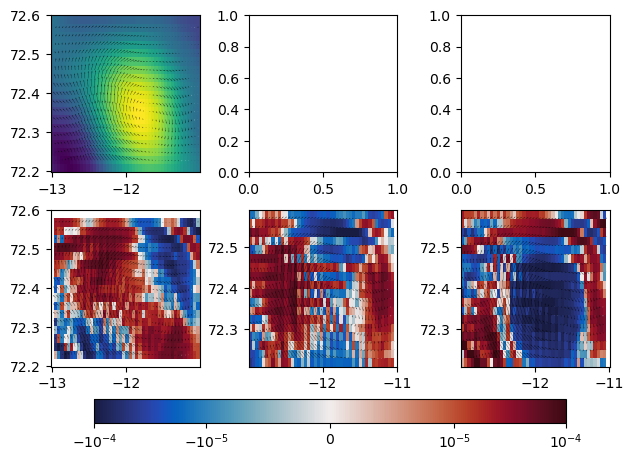

In [73]:
fig, ((ax,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,
    figsize=(6.2217,4.5), layout= 'constrained'
)
norm = mcolors.Normalize(vmin=0, vmax=0.5)
hor_vel_0_normalized = norm(hor_vel)
subsample_factor = 1  # Adjust this value to control the density, e.g., 1 for highest density

# Define the custom colormap
colors = [(1, 1, 1), (1, 1, 1), (0, 0, 0), (0, 0, 0)]  # White to white, then black to black
nodes = [0.0, 0.1, 0.1, 1.0]  # Positions of the colors

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", list(zip(nodes, colors)))

norm_2 = mcolors.SymLogNorm(linthresh=1e-5, vmin=-0.0001, vmax=0.0001, base=10)

q_X, q_Y = np.meshgrid(hor_vel.X,hor_vel.Y) 

quiver = ax.quiver(q_X[::subsample_factor, ::subsample_factor], q_Y[::subsample_factor, ::subsample_factor],
            U_interp.values[::subsample_factor, ::subsample_factor],
            V_interp.values[::subsample_factor, ::subsample_factor],
            hor_vel_0_normalized[::subsample_factor, ::subsample_factor],
            cmap=custom_cmap,scale=25, scale_units='xy', edgecolor='white', alpha=0.7, zorder=1)

ax.pcolormesh(df.Eta.X,df.Eta.Y,df.Eta,zorder=0)

quiver = ax4.quiver(q_X[::subsample_factor, ::subsample_factor], q_Y[::subsample_factor, ::subsample_factor],
            U_interp.values[::subsample_factor, ::subsample_factor],
            V_interp.values[::subsample_factor, ::subsample_factor],
            hor_vel_0_normalized[::subsample_factor, ::subsample_factor],
            cmap=custom_cmap,scale=25, scale_units='xy', edgecolor='white', alpha=0.7, zorder=1)

ax4.pcolormesh(df_od.n_strain.X,df_od.n_strain.Y,df_od.n_strain,zorder=0,norm=norm_2,cmap=cmo.balance)

quiver = ax5.quiver(q_X[::subsample_factor, ::subsample_factor], q_Y[::subsample_factor, ::subsample_factor],
            U_interp.values[::subsample_factor, ::subsample_factor],
            V_interp.values[::subsample_factor, ::subsample_factor],
            hor_vel_0_normalized[::subsample_factor, ::subsample_factor],
            cmap=custom_cmap,scale=25, scale_units='xy', edgecolor='white', alpha=0.7, zorder=1)

ax5.pcolormesh(df_od.s_strain.Xp1,df_od.s_strain.Yp1,df_od.s_strain,zorder=0,norm=norm_2,cmap=cmo.balance)

quiver = ax6.quiver(q_X[::subsample_factor, ::subsample_factor], q_Y[::subsample_factor, ::subsample_factor],
            U_interp.values[::subsample_factor, ::subsample_factor],
            V_interp.values[::subsample_factor, ::subsample_factor],
            hor_vel_0_normalized[::subsample_factor, ::subsample_factor],
            cmap=custom_cmap,scale=25, scale_units='xy', edgecolor='white', alpha=0.7, zorder=1)

mesh = ax6.pcolormesh(df_od.momVort3.Xp1,df_od.momVort3.Yp1,df_od.momVort3,zorder=0,norm=norm_2,cmap=cmo.balance)
cbar = fig.colorbar(mesh, ax=[ax4,ax5,ax6],orientation='horizontal')


In [62]:
print(df_od.momVort3.min().values,df_od.momVort3.max().values)
print(df_od.n_strain.min().values,df_od.n_strain.max().values)
print(df_od.s_strain.min().values,df_od.s_strain.max().values)

-0.00012623929942866808 0.00014170852868496564
-0.0001415216693082464 8.07086128526042e-05
-0.00011076207688961766 8.458530284212778e-05
